In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-jobs-salaries/salaries.csv


In [77]:
salaries = pd.read_csv('/kaggle/input/data-jobs-salaries/salaries.csv')

In [78]:
salaries.shape

(7974, 11)

In [79]:
salaries.head

<bound method NDFrame.head of       work_year experience_level employment_type  \
0          2023               SE              FT   
1          2023               SE              FT   
2          2023               MI              FT   
3          2023               MI              FT   
4          2023               SE              FT   
...         ...              ...             ...   
7969       2020               SE              FT   
7970       2021               MI              FT   
7971       2020               EN              FT   
7972       2020               EN              CT   
7973       2021               SE              FT   

                           job_title   salary salary_currency  salary_in_usd  \
0     Business Intelligence Engineer   202800             USD         202800   
1     Business Intelligence Engineer   104300             USD         104300   
2                       Data Manager    60000             GBP          73824   
3                       D

In [80]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renaming columns

In [81]:
salaries.columns = ['wrk_yr','exp_lvl','emp_type','job_title','salary','sal_curreny','sal_usd','emp_residence','remote_ratio','company_loc','company_size'
                ]

In [82]:
salaries.columns

Index(['wrk_yr', 'exp_lvl', 'emp_type', 'job_title', 'salary', 'sal_curreny',
       'sal_usd', 'emp_residence', 'remote_ratio', 'company_loc',
       'company_size'],
      dtype='object')

Text(0.5, 1.0, 'Missing Data')

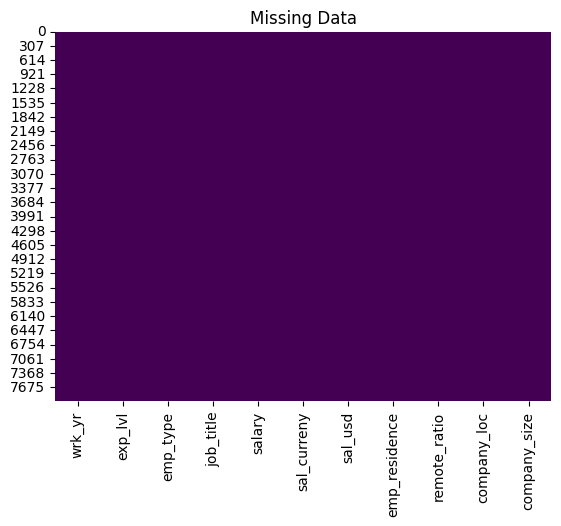

In [83]:
sns.heatmap(salaries.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Data')

There is no missing data.

In [92]:
salaries[salaries.duplicated()].head()

,wrk_yr,exp_lvl,emp_type,job_title,salary,sal_curreny,sal_usd,emp_residence,remote_ratio,company_loc,company_size
39,2023,SE,FT,Data Engineer,184000,USD,184000,US,0,US,M
40,2023,SE,FT,Data Engineer,123000,USD,123000,US,0,US,M
71,2023,SE,FT,Data Engineer,184000,USD,184000,US,0,US,M
72,2023,SE,FT,Data Engineer,123000,USD,123000,US,0,US,M
79,2023,EX,FT,Data Manager,80000,USD,80000,US,0,US,M


Removing Duplicates

In [93]:
salaries.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Employment Type')

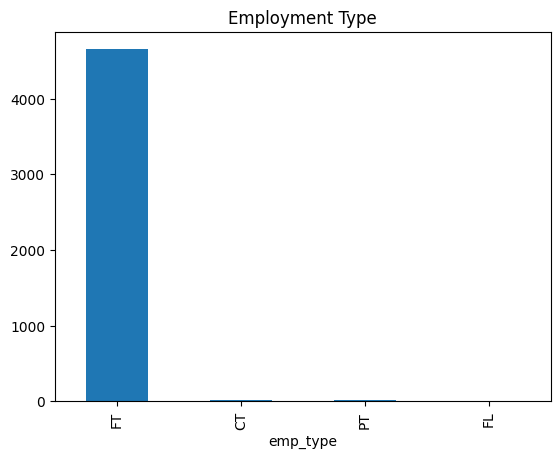

In [94]:
salaries.emp_type.value_counts().plot.bar()
plt.title('Employment Type')

majority work full time.

In [95]:
salaries.salary.value_counts(bins=10)

salary
(-16386.001, 3052600.0]     4672
(3052600.0, 6091200.0]        13
(6091200.0, 9129800.0]         5
(9129800.0, 12168400.0]        2
(27361400.0, 30400000.0]       1
(12168400.0, 15207000.0]       0
(15207000.0, 18245600.0]       0
(18245600.0, 21284200.0]       0
(21284200.0, 24322800.0]       0
(24322800.0, 27361400.0]       0
Name: count, dtype: int64

Text(0.5, 1.0, 'Location of Companies')

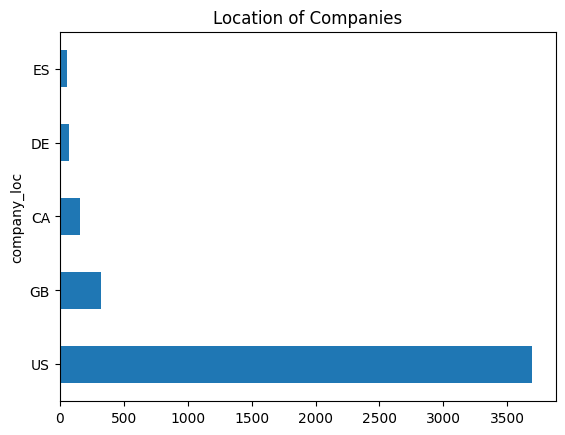

In [96]:
salaries.company_loc.value_counts()[salaries.company_loc.value_counts().values>50].plot.barh()
plt.title('Location of Companies')

Majority are in USA.

Text(0.5, 1.0, 'Residence of Employees')

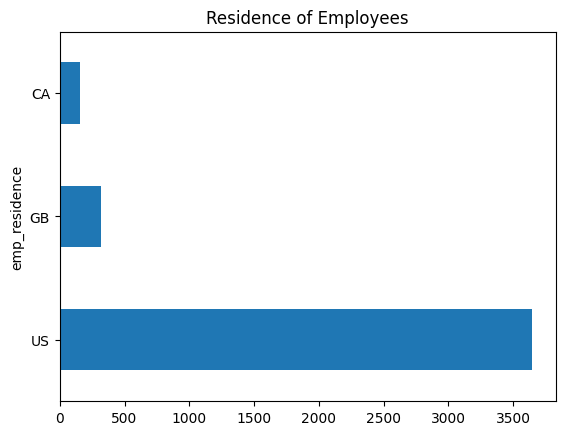

In [97]:
salaries.emp_residence.value_counts()[salaries.emp_residence.value_counts().values>100].plot.barh()
plt.title('Residence of Employees')

Majority live in the US.

Text(0.5, 1.0, 'Experience Level')

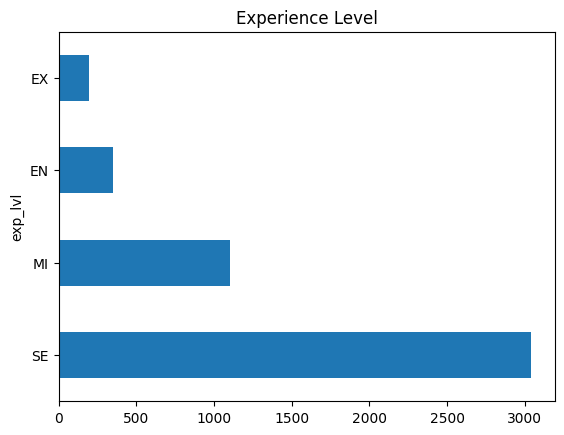

In [98]:
salaries.exp_lvl.value_counts().plot.barh()
plt.title('Experience Level')

Text(0.5, 1.0, 'Mean Salary per experience level')

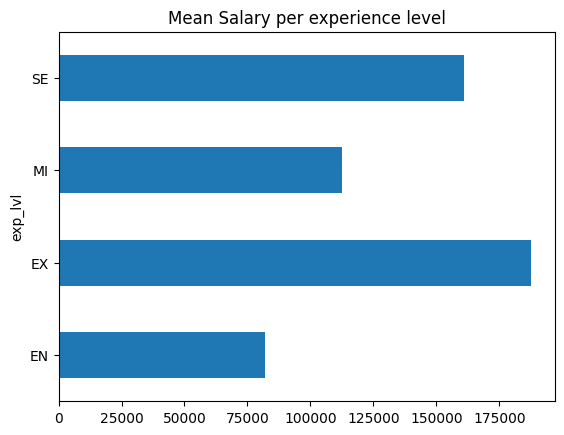

In [99]:
salaries.groupby('exp_lvl')['sal_usd'].agg('mean').plot.barh()
plt.title('Mean Salary per experience level')

Text(0, 0.5, '')

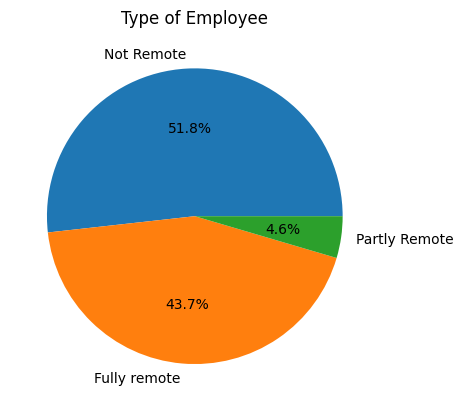

In [100]:
salaries.remote_ratio.value_counts().plot.pie(autopct='%.1f%%',labels=['Not Remote','Fully remote','Partly Remote'])
plt.title('Type of Employee')
plt.ylabel('')

0 - Not remote
100 - Fully remote
50 - Partly remote

Text(0.5, 1.0, 'Locations of Partly Remote Employees')

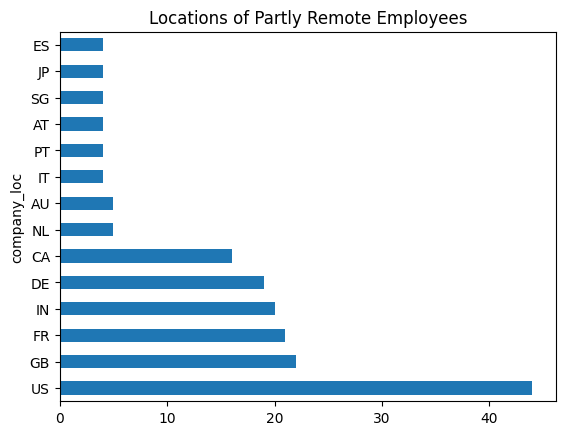

In [101]:
salaries[salaries.remote_ratio==50].company_loc.value_counts()[salaries[salaries.remote_ratio==50].company_loc.value_counts().values>3].plot.barh()
plt.title('Locations of Partly Remote Employees')

Text(0.5, 1.0, 'Locations of Remote Employees')

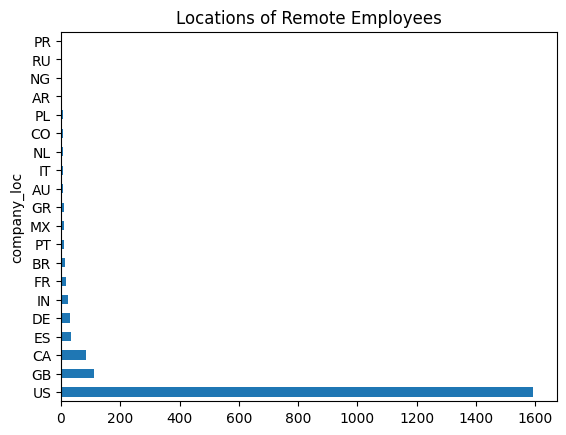

In [102]:
salaries[salaries.remote_ratio==100].company_loc.value_counts()[salaries[salaries.remote_ratio==100].company_loc.value_counts().values>3].plot.barh()
plt.title('Locations of Remote Employees')

Text(0.5, 1.0, 'Work Year')

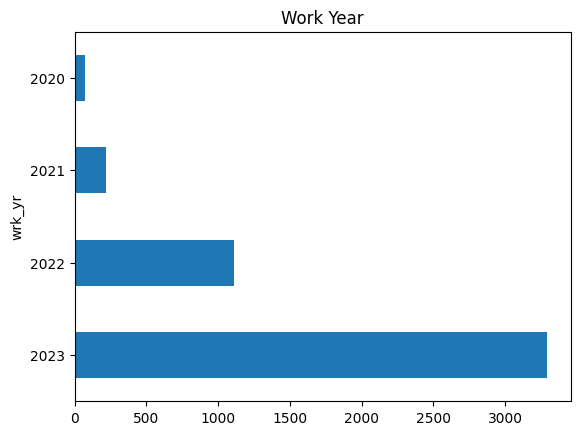

In [103]:
salaries.wrk_yr.value_counts().plot.barh()
plt.title('Work Year')

In [104]:
salaries.groupby('wrk_yr')['exp_lvl'].agg('max')

wrk_yr
2020    SE
2021    SE
2022    SE
2023    SE
Name: exp_lvl, dtype: object

SE is the most occurring experience level.

Text(0.5, 1.0, 'Mean Salary(USD) per Work Year')

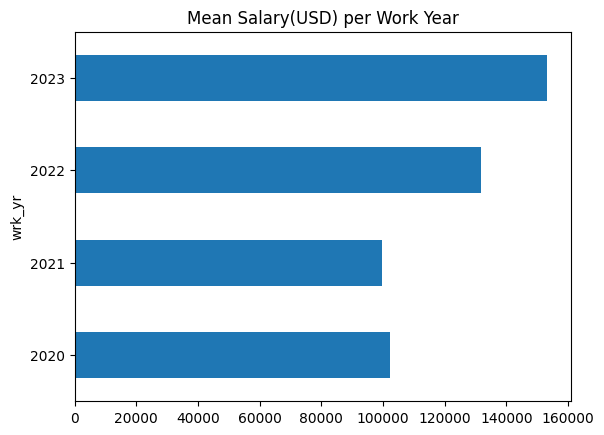

In [105]:
salaries.groupby('wrk_yr')['sal_usd'].agg('mean').plot.barh()
plt.title('Mean Salary(USD) per Work Year')

Text(0.5, 1.0, 'Frequency of Job Title')

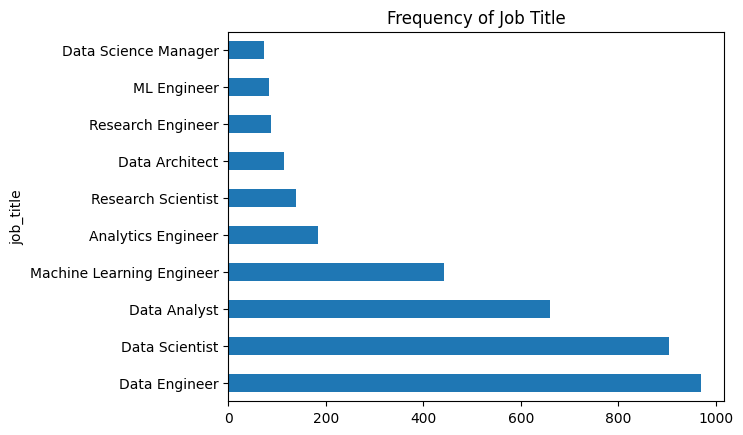

In [106]:
salaries.job_title.value_counts().head(10).plot.barh()
plt.title('Frequency of Job Title')

In [107]:
salaries.groupby('job_title')['salary'].agg('mean').sort_values(ascending=False)

job_title
Principal Data Architect          3.000000e+06
Head of Machine Learning          2.172667e+06
Lead Machine Learning Engineer    1.940250e+06
Lead Data Scientist               8.392368e+05
BI Data Analyst                   7.587500e+05
                                      ...     
Machine Learning Specialist       5.500000e+04
Data DevOps Engineer              5.000000e+04
Compliance Data Analyst           4.500000e+04
Insight Analyst                   4.175000e+04
Data Quality Engineer             2.200000e+04
Name: salary, Length: 118, dtype: float64